# Part I - Exploring 2018 Bike Sharing Data
### by Zoë Walp

### Introduction: 
This dataset analyzes bikesharing information to investigate the distances traveled by individuals renting bicycles from GoBike in San Francisco. Additionally, it explores the Bart Stations from which bicycles are both picked up and returned. The dataset delves into the age, gender, and user status (Customer or Subscriber) of the bicyclists.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

In [2]:
#loading csv file to dataframe using pandas
df_bikeshare = pd.read_csv('bike_share2018.csv')


### Exploring and Describing Dataframe

By looking at this dataframe programatically, we can see that there are a considerable amount of null values within the member_birth_year and member_gender columns. Due to this we can remove this rows in the cleaning seciton. Additionally we can convert the start_time and end_time datatypes to datetime. There do not appear to be any duplicate rows within this dataframe. This dataframe consists of 183412 rows and 16 columns.

In [3]:
df_bikeshare.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
29581,981,2019-02-25 06:59:34.3430,2019-02-25 07:15:56.1700,71.0,Broderick St at Oak St,37.773063,-122.439078,19.0,Post St at Kearny St,37.788975,-122.403452,6485,Customer,1985.0,Female,No
178970,563,2019-02-01 15:51:58.0360,2019-02-01 16:01:21.6150,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1405,Subscriber,1965.0,Female,No
15496,315,2019-02-27 09:25:36.8100,2019-02-27 09:30:52.0260,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,79.0,7th St at Brannan St,37.773492,-122.403672,6331,Subscriber,1992.0,Male,No
108869,1851,2019-02-12 21:00:41.2920,2019-02-12 21:31:32.9150,201.0,10th St at Fallon St,37.797673,-122.262997,181.0,Grand Ave at Webster St,37.811377,-122.265192,1276,Subscriber,1983.0,Other,No
53564,312,2019-02-21 15:27:56.3010,2019-02-21 15:33:08.3630,243.0,Bancroft Way at College Ave,37.869360,-122.254337,249.0,Russell St at College Ave,37.858473,-122.253253,2649,Subscriber,1996.0,Female,No
176287,2110,2019-02-02 11:25:57.6520,2019-02-02 12:01:08.1120,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,70.0,Central Ave at Fell St,37.773311,-122.444293,4949,Subscriber,1985.0,Female,No
37305,635,2019-02-23 14:22:46.1990,2019-02-23 14:33:21.7130,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1667,Subscriber,1978.0,Male,No
112644,242,2019-02-12 14:49:21.6580,2019-02-12 14:53:23.7140,343.0,Bryant St at 2nd St,37.783172,-122.393572,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5344,Customer,1990.0,Male,No
128153,493,2019-02-10 13:55:45.8440,2019-02-10 14:03:58.8740,267.0,Derby St at College Ave,37.861804,-122.253569,171.0,Rockridge BART Station,37.844279,-122.251900,2848,Subscriber,1960.0,Male,No
96186,2260,2019-02-15 10:41:26.7960,2019-02-15 11:19:07.6520,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,5559,Customer,1966.0,Male,No


In [4]:
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#finding any duplicates
df_bikeshare.duplicated().sum() 

0

In [6]:
#dataframe structure
df_bikeshare.shape

(183412, 16)

### Questions to consider:

* How does the distribution of rides vary between various user types?
* What is the average bike ride duration in minutes?
* What is the most popular start station looking at the number of rides starting from it?
* Are there any correlations between age and duration of bike rides?
* What times of day are people more likely to ride bikes based on start time? How does this vary among genders?
* How many unique bike id's are there, and what is the average number of rides per bike?
* What is the dispersal of ages within this dataset? 
* Has bike usage changed over time?
* Are there any outliers regarding biker ages? 
* Is there a relationship between ride start location and ride duration? 
* Which gender tends to rent bikes more? 



When addressing the questions above, it is necesary to assess the nature of the data, whether it falls into discrete, continuous or categorical categories. Moreover, when creating visual representations, it's essential to to discern whether the data is qualitative or quantitative, as this will guide the selection of appropriate chart types.


### Cleaning Data

In [7]:
#removing null rows for member_birth_year and member_gender
def clean_dataframe(dataframe, columns_to_clean):
    df_cleaned = dataframe.dropna(subset=columns_to_clean)
    return df_cleaned

columns_to_clean = ['member_birth_year', 'member_gender', 'end_station_id', 'end_station_name']
df_bike_clean = clean_dataframe(df_bikeshare, columns_to_clean)
print(df_bike_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [8]:
#converting start_time and end_time datatypes from object to datetime
df_bike_clean=df_bike_clean.copy()
columns_to_convert = ['start_time','end_time']

def change_columns_datatype(df,column_names):
    for col in column_names:
        df_bike_clean[col]=pd.to_datetime(df_bike_clean[col])
change_columns_datatype(df_bike_clean,columns_to_convert)
print(df_bike_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [9]:
#adding duration in minutes and seconds column 
df_bike_clean['duration_min']=df_bike_clean['duration_sec']/60.0
# df_bike_clean['duration_min']=df_bike_clean['duration_min'].apply(lambda x: '{:02d}:{:02d}'.format(int(x), int((x % 1) * 60)))
df_bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333


In [10]:
#adding an age column
current_year = datetime.datetime.now().year
df_bike_clean['biker_age']=current_year-df_bike_clean['member_birth_year']
df_bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,biker_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,39.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,51.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,34.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,49.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,64.0


In [11]:
#saving df_bike_clean to csv
df_bike_clean.to_csv('bike_clean.csv',index=False)

## Univariate Exploration

### Question: What is the dispersal of ages within this dataset?

### Graphing a Histogram

Text(0, 0.5, 'Cnt of Riders')

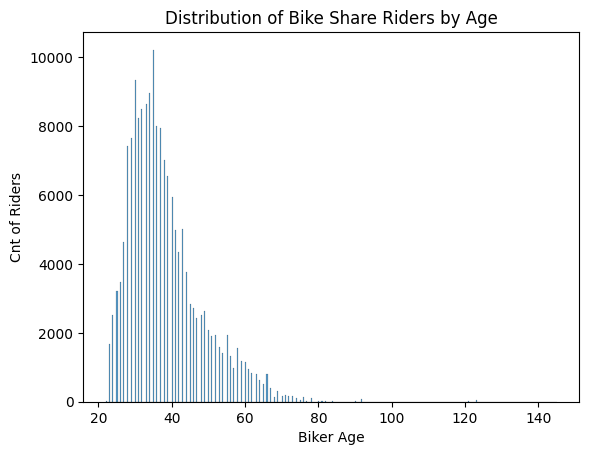

In [12]:
#creating histogram 
bin_count=int(np.sqrt(len(df_bike_clean['biker_age'])))
sns.histplot(data=df_bike_clean, x='biker_age',bins=bin_count)
plt.title('Distribution of Bike Share Riders by Age')
plt.xlabel('Biker Age')
plt.ylabel('Cnt of Riders')


### Histogram Reflections

The histogram illustrating the age distribution of bike riders reveals a unimodal pattern, indicating a single peak around a specific age where most riders are concentrated. It looks like most riders were in their 30's to 40's.

As we examine potential outliers, we notice a gap in the distribution as we move away from the central point. However, it's important to note that this gap doesn't necessarily indicate the presence of outliers.

The histogram appears to have a right-skewed shape. When it comes to age, transformations are not typically applied since this data is considered discrete rather than continuous, and it is best preserved in its original form.



### Question: Which gender rents bikes more?

### Graphing a Bar Chart

<AxesSubplot: xlabel='Gender', ylabel='Count'>

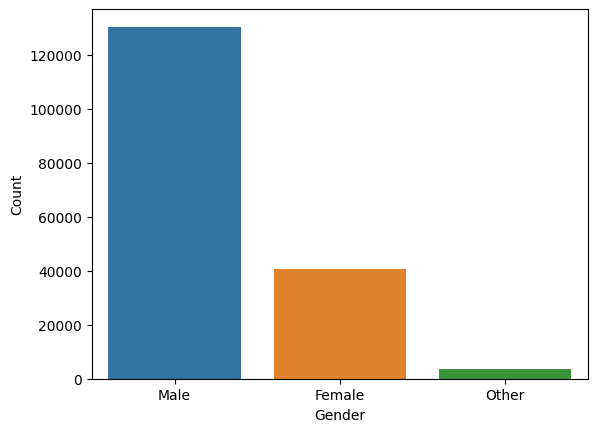

In [13]:
#counting data
data_counts=df_bike_clean['member_gender'].value_counts().reset_index()
data_counts.columns=['Gender','Count']
sns.barplot(x='Gender',y='Count',data=data_counts)

### Bar Chart Reflections
By looking at the counts of genders who rented a bikeshare bike, one can see that 4000 females did this, while over 12000 males did this. Perhaps this trend is true since men typically feel safer being on their own, suggesting that they may be more willing to bike on their own in a city such as San Francisco.

## Bivariate Exploration

### Question: Are there any correlations between birth year and duration of bike rides?

### Graphing a Scatterplot

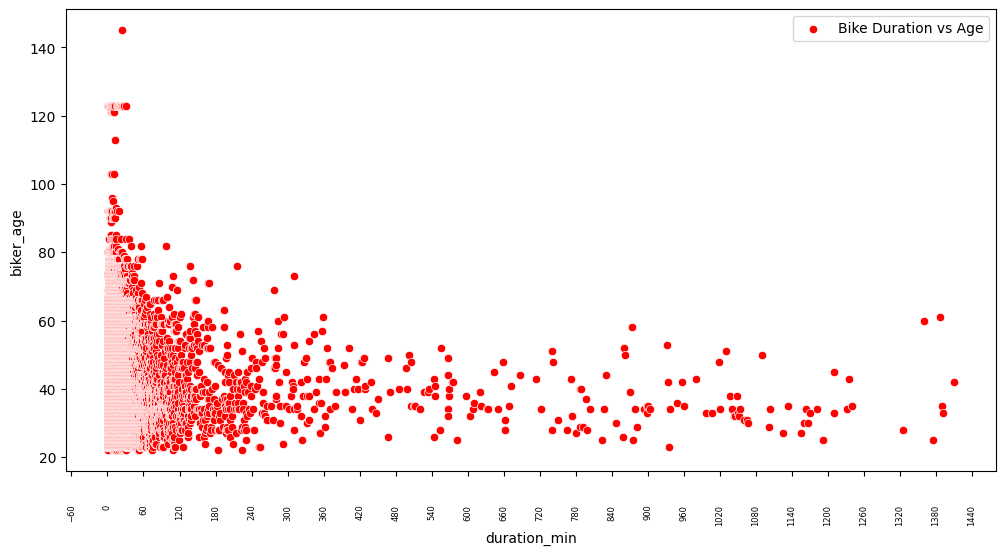

In [14]:
#scatterplot graphing using sns

plt.figure(figsize=(12,6))
df_sorted_duration=df_bike_clean.sort_values(by='duration_min')
x=df_sorted_duration['duration_min']
y=df_sorted_duration['biker_age']
sns.scatterplot(x=x,y=y,label='Bike Duration vs Age', color='red',marker='o')
plt.xticks(fontsize=6,rotation=90)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
plt.tick_params(axis='x',which='both',pad=20)
plt.show()

### Scatter Plot Reflections: 

It appears that most riders of all age groups typically return their bikes within a short time frame, often within a couple of hours. This suggests that the bike share service is primarily used for short trips, and users don't typically keep the bikes for extended periods. However, there are a few exceptional cases where bikes were rented for an entire 24-hour period.

Additionally, I observed a few outliers in the age data, which could potentially be the result of incorrect data entry. There are approximately ten data points with ages exceeding 100, which implies the presence of some riders with unusually high ages. This seems unlikely and may be attributed to data anomalies or errors.

### Question: Are there any outliers regarding biker ages? 

### Graphing a Boxplot

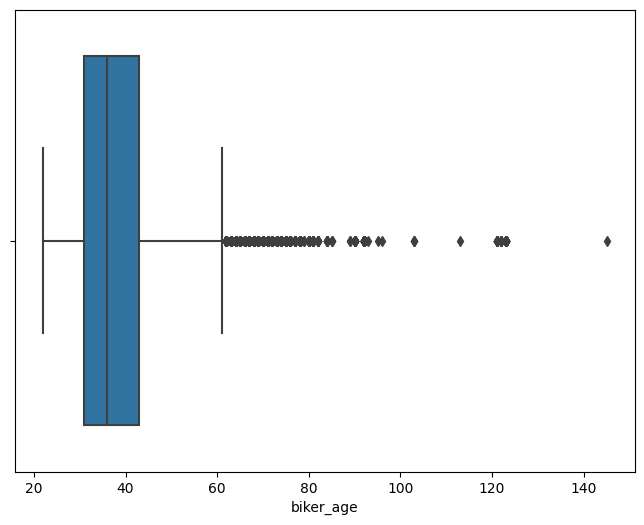

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='biker_age',data=df_bike_clean,orient='h')
plt.show()

### Boxplot Reflections: 

In the context of the box plot depicting biker ages, we observe that the bulk of the data is concentrated within the age range of 30 to 45 years, indicating the central tendency of the dataset. The plot extends to approximately one standard deviation above and below this range, encompassing ages around 20 and 60 years. However, there are some data points that exceed the age of 100, which suggests a potential data entry error during the initial data collection. This general pattern aligns with the trends seen in the age distribution graph, reinforcing the consistency of the findings.

### Question: What times of day are people more likely to ride bikes based on start time? How does this vary among genders?

### Graphing a Clustered Bar Chart

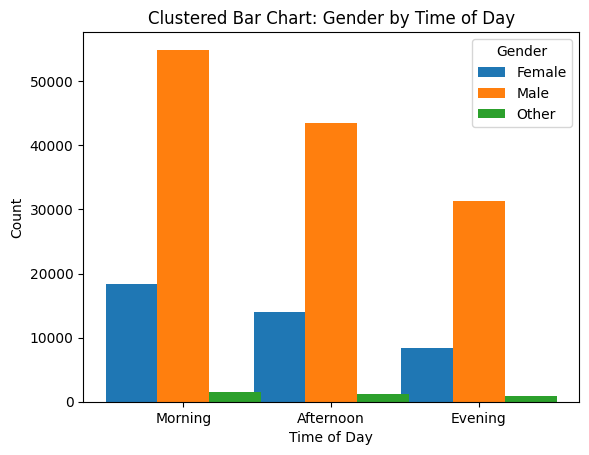

In [16]:
##CLUSTERED BAR CHART##
# # Define time intervals
time_frames = [0, 12, 17, 24]
time_labels = ['Morning', 'Afternoon', 'Evening']
# # Convert 'start_time' to datetime
df_bike_clean['start_time'] = pd.to_datetime(df_bike_clean['start_time'])
# # Extract hour from 'start_time' to create the 'time_of_day' column
df_bike_clean['hour'] = df_bike_clean['start_time'].dt.hour
df_bike_clean['time_of_day'] = pd.cut(df_bike_clean['hour'], bins=time_frames, labels=time_labels)
# Create a pivot table to count occurrences
grouped_data = df_bike_clean.pivot_table(index='time_of_day', columns='member_gender', aggfunc='size', fill_value=0)
# Create the figure and axes
fig, ax = plt.subplots()
# Bar speculations
bar_width = 0.35
x = range(len(grouped_data))
# Create bars for each gender within each time of day using loop
for i, gender in enumerate(grouped_data.columns):
    ax.bar(x, grouped_data[gender], bar_width, label=gender)
    x = [pos + bar_width for pos in x]

# Set labels
ax.set_xticks([pos + bar_width for pos in range(len(grouped_data))])
ax.set_xticklabels(grouped_data.index)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Count')
ax.set_title('Clustered Bar Chart: Gender by Time of Day')

# Plot
plt.legend(title='Gender')
plt.show()



### Clustered Bar Chart Reflections


This bar chart clearly illustrates a significant male ridership, especially during the morning hours. In the morning, nearly 6,000 males took bike rides, whereas the number of female riders was just below 2,000.

During the afternoon, the number of male riders decreased to slightly under 5,000, and a similar number of females also took rides, reaching just under 2,000.

In the evening, ridership for both genders decreased further, with approximately 3,500 males and a little over 1,000 females riding. The count for the 'other' gender category remained fairly consistent across morning, afternoon, and evening.

Overall, the chart highlights a significant disparity in the number of male and female riders, with the highest male ridership observed in the morning and a more balanced distribution during the afternoon. The 'other' gender category maintained a relatively stable ridership count throughout the day.

### Question: What is the distribution of start and stop points within San Francisco?

### Graphing a Heatmap


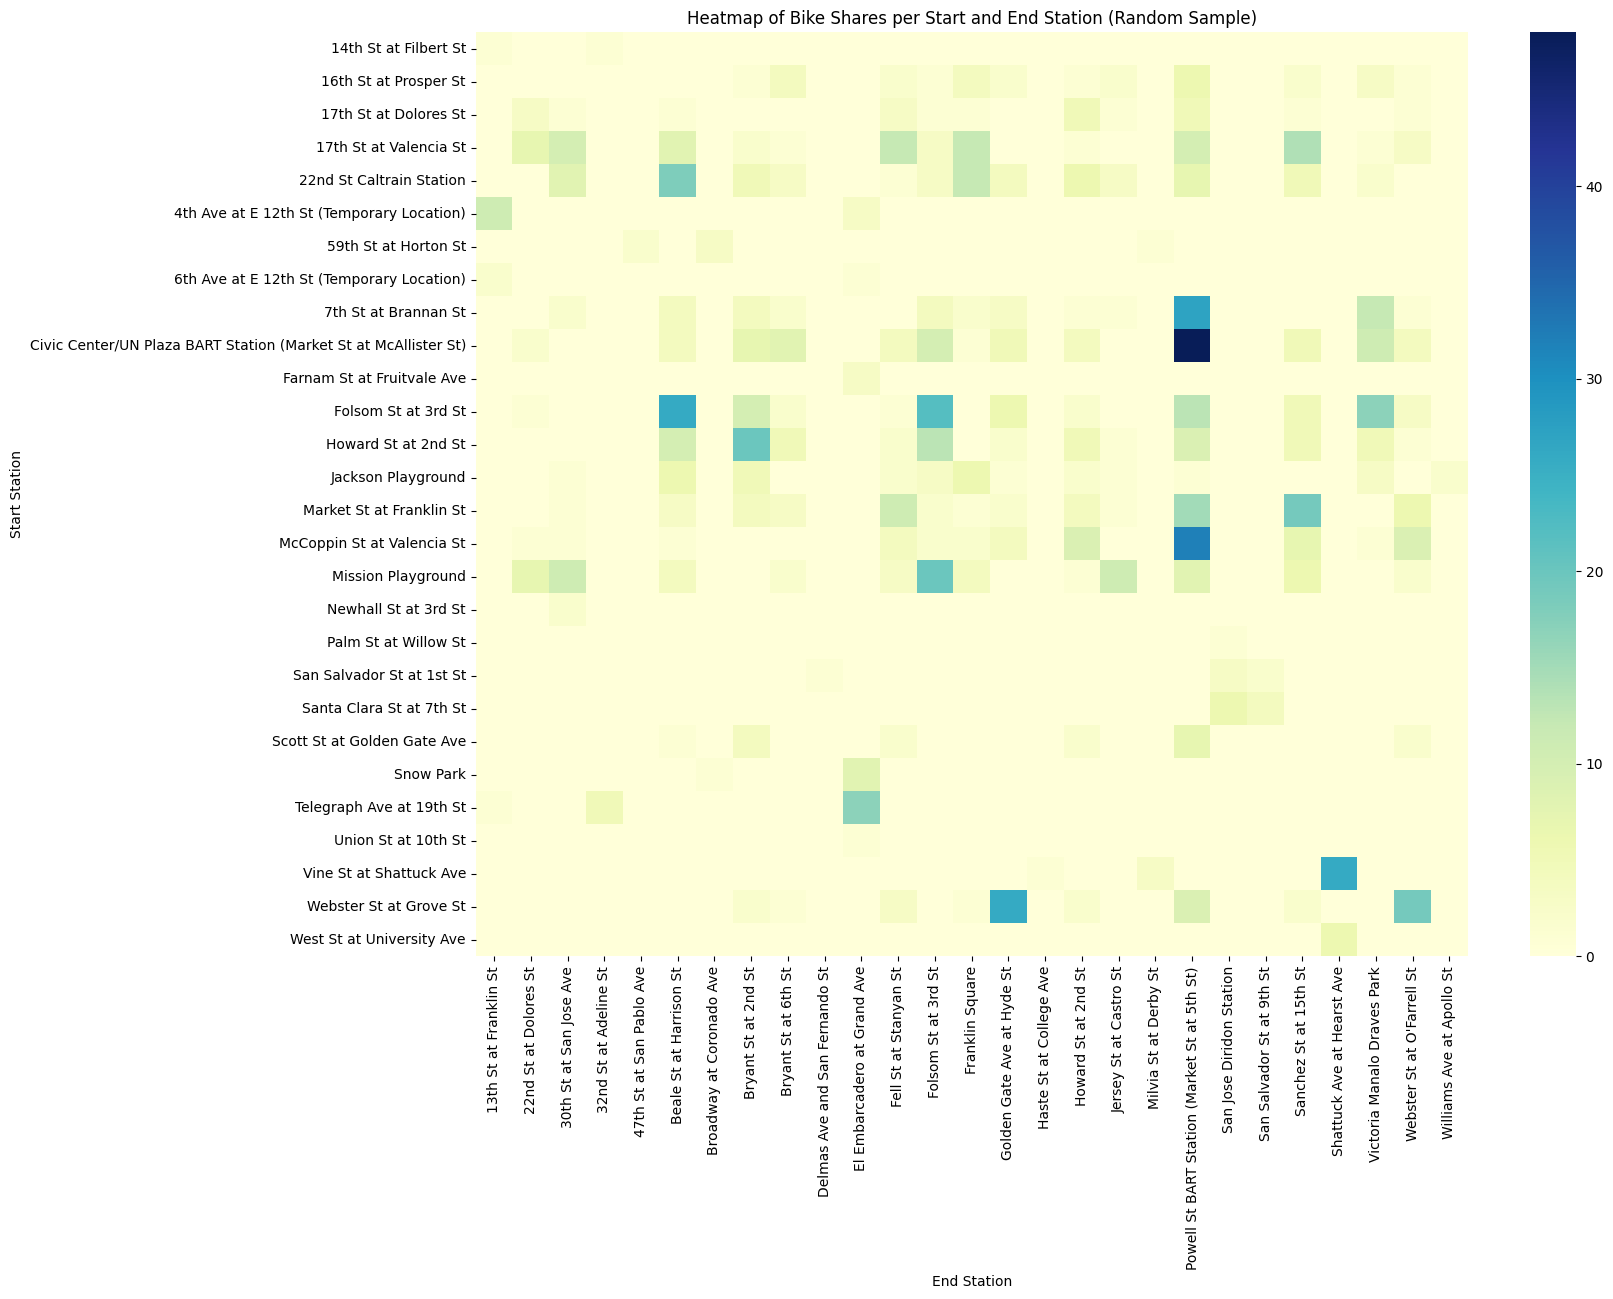

In [17]:
#graphing heatmap 
def plot_heatmap_random(dataframe, num_samples):
    # Randomly sample the start stations
    random_start_stations = pd.Series(dataframe['start_station_name'].unique()).sample(num_samples, random_state=42)

    # Randomly sample the stop stations
    random_stop_stations = pd.Series(dataframe['end_station_name'].unique()).sample(num_samples, random_state=42)

    # Filter the DataFrame to include only rows with start and stop stations in sample of 30 
    filtered_df = dataframe[dataframe['start_station_name'].isin(random_start_stations) & dataframe['end_station_name'].isin(random_stop_stations)]

    # Create a pivot table with filtered data
    pivot_data = filtered_df.pivot_table(index='start_station_name', columns='end_station_name', values='bike_id', aggfunc='count', fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=False, annot_kws={"size": 10})
    plt.title('Heatmap of Bike Shares per Start and End Station (Random Sample)')
    plt.xlabel('End Station')
    plt.ylabel('Start Station')
    plt.show()

# Usage
num_samples = 30
plot_heatmap_random(df_bike_clean, num_samples)

### Heatmap Reflections

This dataset is quite extensive, so we've taken a random sample of start and stop stations to provide a manageable overview. From this sample, it's evident that BART stations and major intersections tend to have a higher frequency of bike start and stop events. For instance, Powell St BART station is a popular drop-off location for bicyclists, while Plaza BART Station sees a significant number of bicycle pickups. In contrast, stations like West St at University Ave and Haste St at College Ave experience less bike traffic.

It's important to note that this sample represents just 30 stations out of over 300 in the dataset, so it may not fully reflect the true popularity of bike share stations.

## Multivariate Exploration


### Question: How does the distribution of rides vary between various user types?

### Graphing a Facet Plot

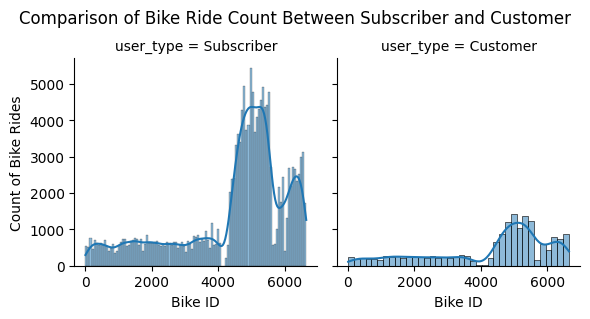

In [18]:
def facet_comparison(dataframe):
    ride_count = dataframe['bike_id'].value_counts().reset_index()
    ride_count.columns = ['bike_id', 'ride_count']
    
    g = sns.FacetGrid(data=dataframe, col='user_type', col_order=['Subscriber', 'Customer'])
    g.map(sns.histplot, 'bike_id', kde=True)
    g.set_axis_labels('Bike ID', 'Count of Bike Rides')
    g.fig.suptitle('Comparison of Bike Ride Count Between Subscriber and Customer', size=12, y=1.05)
    plt.show()

# Usage
facet_comparison(df_bike_clean)

### Facet Plot Reflections

The data indicates a significantly higher number of subscribers compared to customers. Subscribers tend to have a substantially greater number of rides, with the highest recorded ride count for customers being approximately 1500, whereas some subscribers have more than 4000 rides on record per biker.

### Question: Are there any correlations between age and duration of bike rides? 

### Graphing a Scatterplot With Encodings

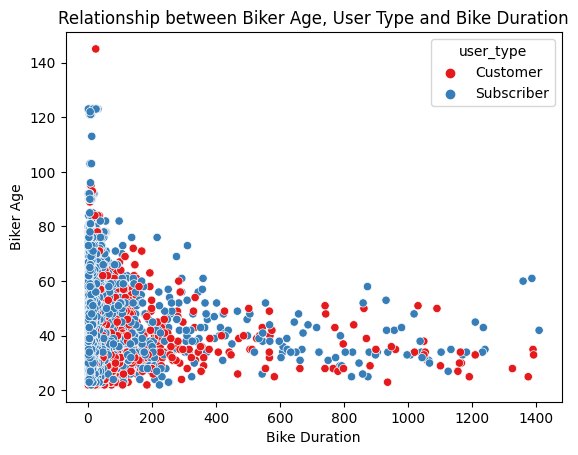

In [19]:
x=df_bike_clean['duration_min']
y=df_bike_clean['biker_age']
category_data=df_bike_clean['user_type']

my_colors=sns.color_palette('Set1')
sns.set_palette(my_colors)
sns.scatterplot(x=x,y=y,hue=category_data)
plt.xlabel('Bike Duration')
plt.ylabel('Biker Age')
plt.title('Relationship between Biker Age, User Type and Bike Duration')
plt.show()


### Embedded Scatterplot Reflections 


Upon analyzing this visual representation, it becomes evident that individuals belonging to both the user and subscriber categories span all age groups of cyclists. Most users, encompassing both subscribers and customers, are predominantly found among those under the age of 60. In general, there isn't a clear, straightforward correlation between the age of the cyclist and the duration of their bike ride. The data points are dispersed throughout the graph, indicating a broad range of variability. However, it's noteworthy that a distinct group of users is observable, characterized by bike rides lasting less than 200 minutes and an age range primarily falling between 20 and 40 years.

## Conclusions

This dataset looks at trends among bike share rentals in San Francisco in 2018. It accounts for age, membership type, gender, rider duration as well as geolocations of start and stop points of rideshares in San Francisco

* More males ride bikes than females
* Young and old people ride bikes
* Ride duration varies from a few minutes to many hours on end
* Bike share riders start and stop at many different places throughout the city, making this service readily available.
* Ride share subscribers use this service more than ride share customers